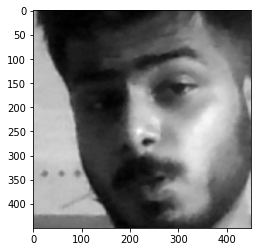

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


##how will extract numpy array an train those..that is something we have mentioned overhere.
DataDir="./Dataset/ownDataset/"
CATEGORIES = ['neutral','smile','surprise','angry']
for category in CATEGORIES:
    path=os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        
       

In [2]:
#showing example numpy array
img_array.shape
img_array[:1]

array([[132, 132, 129, 124, 120, 114, 102,  89,  77,  67,  60,  51,  44,
         41,  37,  36,  34,  33,  33,  33,  33,  32,  32,  31,  32,  32,
         32,  32,  31,  31,  31,  31,  31,  31,  30,  30,  30,  30,  30,
         30,  30,  30,  29,  28,  28,  27,  26,  25,  24,  24,  24,  24,
         24,  24,  24,  24,  24,  24,  24,  24,  23,  23,  24,  24,  25,
         25,  25,  25,  25,  25,  25,  26,  26,  26,  24,  24,  24,  25,
         25,  25,  24,  24,  24,  24,  24,  24,  24,  23,  23,  23,  23,
         23,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,
         24,  23,  23,  23,  23,  23,  24,  24,  24,  24,  24,  24,  25,
         26,  25,  25,  25,  25,  25,  26,  26,  26,  25,  25,  24,  24,
         24,  24,  24,  24,  23,  23,  25,  25,  26,  28,  29,  30,  31,
         31,  31,  31,  32,  33,  33,  34,  35,  36,  36,  37,  38,  38,
         39,  38,  38,  38,  38,  39,  39,  40,  40,  38,  37,  36,  36,
         35,  34,  33,  33,  33,  33,  32,  31,  30

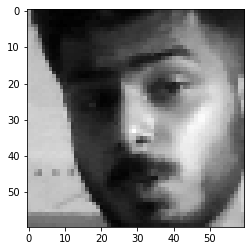

In [3]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [4]:
##lets create training data and will combined that with respective category

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DataDir,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
        

In [5]:
##letsee some datapoint from training_data
training_data[:1]

[[array([[ 45,  33,  30, ..., 154, 159, 163],
         [ 47,  32,  30, ..., 159, 161, 166],
         [ 41,  32,  27, ..., 159, 162, 167],
         ...,
         [146, 146, 144, ..., 156, 169, 176],
         [146, 145, 139, ..., 175, 178, 179],
         [141, 128, 126, ..., 174, 179, 178]], dtype=uint8),
  0]]

In [6]:
##randomized data
import random
random.shuffle(training_data)

In [7]:
##lets create features & labels

x=[]
y=[]


for features,label in training_data:
    x.append(features)
    y.append(label)
##reshaping into 4d array to feed our deep learning model
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x.ndim)
print(x.shape)
print(x[:1])

4
(1200, 60, 60, 1)
[[[[138]
   [133]
   [102]
   ...
   [154]
   [156]
   [159]]

  [[137]
   [130]
   [121]
   ...
   [154]
   [154]
   [159]]

  [[132]
   [131]
   [110]
   ...
   [154]
   [157]
   [158]]

  ...

  [[140]
   [136]
   [138]
   ...
   [178]
   [173]
   [175]]

  [[102]
   [ 97]
   [ 99]
   ...
   [132]
   [133]
   [135]]

  [[ 96]
   [ 96]
   [ 97]
   ...
   [129]
   [130]
   [130]]]]


In [9]:
#lets load our data

import pickle 
#x
pickle_out=open("x_LOAD_DATA.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
#y
pickle_out=open("y_LOAD_DATA.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()